# Handwritten Digit Classification using K-nearest-neighbors

### Make the notebook compatible with both Python 2 and 3

http://python-future.org/compatible_idioms.html

In [4]:
from __future__ import absolute_import, division, print_function

In [5]:
import numpy as np
import tensorflow as tf

### Plot graphs inline

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.3.0
1.13.1
2.0.2


### Download and extract the MNIST libraries

The original site where this dataset is available: http://yann.lecun.com/exdb/mnist/

In [8]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data

# Store the MNIST data in mnist_data/
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


### Helper function to display one digit image

Reshape the data from 1-D array to a 2-D array of 28x28 pixels

In [9]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

### Access the training and test data and the corresponding labels

In [76]:
training_digits, training_labels = mnist.train.next_batch(1000)
test_digits, test_labels = mnist.test.next_batch(200)

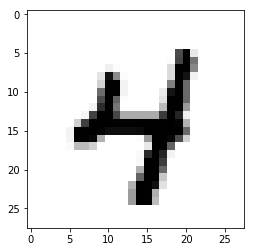

In [64]:
display_digit(training_digits[1])

In [65]:
training_labels[:5]

array([6, 4, 9, 4, 0], dtype=uint8)

In [66]:
tf.reset_default_graph()

### Placeholders for training and test data

* The training dataset placeholder can have any number of instances and each instance is an array of 28x28 = 784 pixels
* The test placeholder will hold just a single digit image at a time

In [67]:
training_digits_pl = tf.placeholder("float", [None, 784])

test_digit_pl = tf.placeholder("float", [784])

### Get the label which occurs the most often in our predicted set

* *labels*: The labels associated with the entire training dataset
* *indices*: The indices of those images which are the closest to the test image
* Returns the labels which has been predicted the most often

In [68]:
def get_majority_predicted_label(labels, indices):
    predicted_labels = []
    for i in indices:
        predicted_labels.append(labels[i])
        
    predicted_labels = np.array(predicted_labels)
    
    print(predicted_labels)
    
    # Place the labels into bins and find the bin with the highest number of labels
    counts = np.bincount(predicted_labels)
    
    return np.argmax(counts)

### Nearest neighbor calculation using L1 distance

* Calculate the **absolute value** of the distance between the test image and the training set
* Calculate the **sum** of the distance between the test image and all training images
* Find the images in the training data that are the k closest neigbors
* *top_k* finds the highest values, apply it to the negative of the distances

In [75]:
l1_distance = tf.abs(tf.subtract(training_digits_pl, test_digit_pl))

distance_l1 = tf.reduce_sum(l1_distance, axis=1)

pred_knn_l1 = tf.nn.top_k(tf.negative(distance_l1), k=1)

### Nearest neighbor calculation using L2 (Euclidean) distance

* Calculate the **square** of the distance between the test image and the training set
* Calculate the **square root of the sum of squares*** of the distance between the test image and all training images
* Find the images in the training data that are the k closest neigbors
* *top_k* finds the highest values, apply it to the negative of the distances

In [74]:
# Nearest Neighbor calculation using L2 distance
l2_distance = tf.square(tf.subtract(training_digits_pl, test_digit_pl))

distance_l2 = tf.sqrt(tf.reduce_sum(l2_distance, axis=1))

pred_knn_l2 = tf.nn.top_k(tf.negative(distance_l2), k=1)

In [71]:
accuracy = 0.

In [72]:
# Initializing the variables
init = tf.global_variables_initializer()

In [73]:
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(test_digits)):
        # Get nearest neighbor
        _, indices = sess.run(pred_knn_l1, \
        	feed_dict={training_digits_pl: training_digits, test_digit_pl: test_digits[i, :]})

        predicted_label = get_majority_predicted_label(training_labels, indices)
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", predicted_label, \
            "True Label:", test_labels[i])

        # Calculate accuracy
        if predicted_label == test_labels[i]:
            accuracy += 1./len(test_digits)

    print("Done!")
    print("Accuracy:", accuracy)

[3 3 3 3 3]
Test 0 Prediction: 3 True Label: 3
[0 0 0 0 0]
Test 1 Prediction: 0 True Label: 0
[9 9 4 9 9]
Test 2 Prediction: 9 True Label: 9
[0 0 0 0 0]
Test 3 Prediction: 0 True Label: 0
[6 6 6 6 6]
Test 4 Prediction: 6 True Label: 6
[3 3 3 3 3]
Test 5 Prediction: 3 True Label: 3
[5 5 5 5 5]
Test 6 Prediction: 5 True Label: 5
[5 5 5 5 5]
Test 7 Prediction: 5 True Label: 5
[5 5 5 5 5]
Test 8 Prediction: 5 True Label: 5
[4 4 4 4 4]
Test 9 Prediction: 4 True Label: 4
[9 9 9 9 9]
Test 10 Prediction: 9 True Label: 9
[5 5 5 5 5]
Test 11 Prediction: 5 True Label: 5
[2 2 2 2 2]
Test 12 Prediction: 2 True Label: 2
[0 0 0 0 0]
Test 13 Prediction: 0 True Label: 0
[5 5 5 5 5]
Test 14 Prediction: 5 True Label: 5
[7 7 7 7 7]
Test 15 Prediction: 7 True Label: 7
[0 0 0 0 0]
Test 16 Prediction: 0 True Label: 0
[1 1 1 1 1]
Test 17 Prediction: 1 True Label: 1
[0 0 0 0 0]
Test 18 Prediction: 0 True Label: 0
[4 2 2 2 2]
Test 19 Prediction: 2 True Label: 2
[5 5 5 5 5]
Test 20 Prediction: 5 True Label: 5
[3